In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

(1200, 1920, 3)
1200 1920
[144 122 178]
(23040, 3)


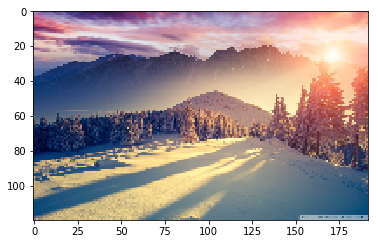

In [6]:
im = cv2.imread('./im.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#matplotlib work in RGB and cv2 in BGR
print(im.shape)
r, c = im.shape[:2]
print(r,c)
out_r = 120
im = cv2.resize(im, (int(out_r*float(c)/r), out_r)) #reduce the size of image
pixels = im.reshape((-1, 3))#convert matrix into single array or list flattening
 
print(pixels.shape)
plt.imshow(im)

In [8]:
km = KMeans(n_clusters=8)#how many cluster of different cluster you want
km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
colors = np.asarray(km.cluster_centers_, dtype='uint8') #centers of different cluster
print(colors)

[[244 221 194]
 [ 70  91 122]
 [188 144 127]
 [193 163 178]
 [ 29  48  91]
 [235 196 146]
 [133  82  91]
 [126 124 136]]


In [11]:
per = np.asarray(np.unique(km.labels_, return_counts=True)[1], dtype='float32')
per = per / pixels.shape[0]
per #per holding the fraction of each different color

array([ 0.10034722,  0.15134549,  0.15047742,  0.08515625,  0.12903646,
        0.14240451,  0.08394098,  0.15729167], dtype=float32)

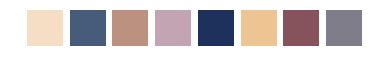

In [20]:
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3)) #multidimentional metrics
     
    patch[:, :, :] = 255 - colors[ix]
    plt.subplot(1, colors.shape[0], ix+1)
    plt.axis("off")
    plt.imshow(patch)

In [19]:
dom = [[per[ix], colors[ix]] for ix in range(km.n_clusters)]
DOM = sorted(dom, key=lambda z: z[0], reverse=True)#find the reverse order of dominant colors

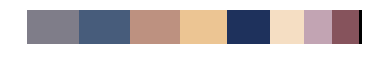

In [21]:
plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3))

start = 0
for cx in range(km.n_clusters):
    width = int(DOM[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = 255 - DOM[cx][1]
    start = end

plt.imshow(patch)
plt.show()